# School-YRBS: Friends

## Objetive

The administration wants to better understand the social dynamic of the high school. The dataset contains a relevant column called friends, which is the number of friends of the student.


<p>&nbsp; &nbsp; 1. What is the distribution of the number of friends?</p>
<p>&nbsp; &nbsp; 2. What are the gender breakdown of friends?</p>
<p>&nbsp; &nbsp; 3. What is the breakdown by race?.</p>


## Analize

Imports and load data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pySankey import sankey
%matplotlib inline

In [5]:
data = pd.read_csv('school-yrbs/Somerville_High_School_YRBS_Raw_Data_2002-2016.csv')

## What is the distribution of the number of friends?


In order to analyze the distribution of the number of friends, the number of people who have different possible values of number of friends is displayed. obtaining the following graph:

Text(0,0.5,'Number of students')

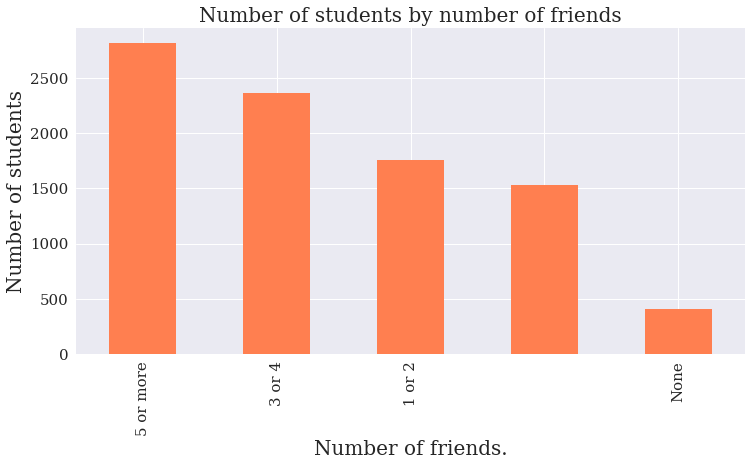

In [47]:
plt.figure(figsize=(12,6))
data.friends.value_counts().plot(kind='bar', color='coral', fontsize=15)
plt.title('Number of students by number of friends',fontsize=20)
plt.xlabel('Number of friends.',fontsize=20)
plt.ylabel('Number of students',fontsize=20)


See that while decrease the amount of friends also decrease the amount of people with this count of friends.

## What are the gender breakdown of friends?


To observe the differences by gender in the number of friends, we proceed to obtain a graph with the flow of number of friends by gender.

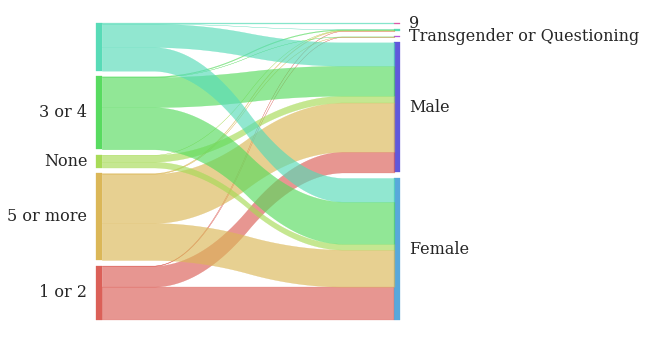

In [33]:
sankey.sankey(data.friends, data.gender, aspect=4, fontsize=16)

See that who have 1 or 2 friends suelen to be female,for 5 or more the distribution is equalitive, while that for  3 or 4 there are a little difference betwin both but female is more comun and for transgender or questioning there are a little proportion.


To analyze more specifically the number of friends, proceed to make a heat map to compare the number of friends per gender of each

In [34]:
friendsGender= pd.pivot_table(data,values='race' , index=['friends'],
                     columns=['gender'], aggfunc='count')

In [35]:
friendsGender

gender,,9,Female,Male,Transgender or Questioning
friends,,,,,
,1.0,7.0,765.0,755.0,NaN
1 or 2,7.0,NaN,1076.0,673.0,4.0
3 or 4,25.0,NaN,1362.0,970.0,3.0
5 or more,20.0,NaN,1196.0,1588.0,7.0
None,4.0,NaN,189.0,219.0,NaN


Text(88,0.5,'Gender')

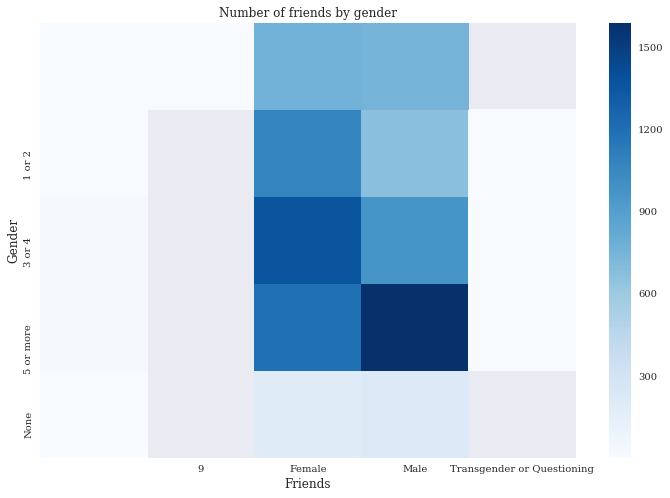

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.heatmap(friendsGender, ax=ax, cmap='Blues')
g.set_title("Number of friends by gender", fontsize=12)
g.set_xlabel("Friends",fontsize=12)
g.set_ylabel("Gender", fontsize=12)

Male are the ones who have more than 5 or more friends, but women also have a high value, being 3 or 4 the most frequent value of friends in women

To visualize the preponderance for genders with minority amount, we procedure to visualize the number of friends for Transgender and Questioning and who don't answer:

Text(88,0.5,'Gender')

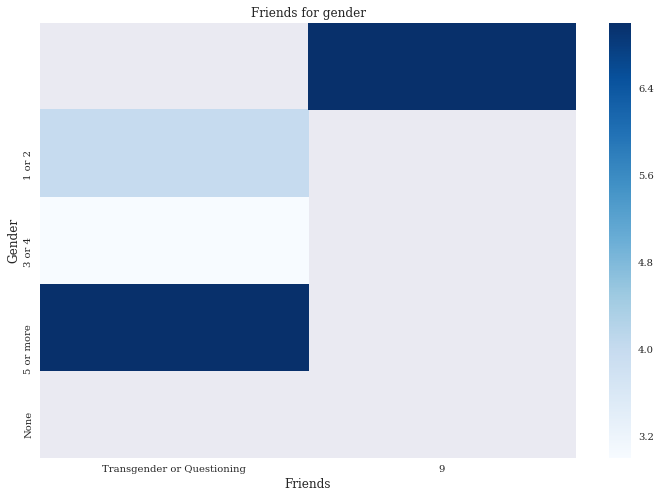

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
g = sns.heatmap(friendsGender[['Transgender or Questioning','9']], ax=ax, cmap="Blues")
g.set_title("Friends for gender", fontsize=12)
g.set_xlabel("Friends",fontsize=12)
g.set_ylabel("Gender", fontsize=12)

see that Transgender and Questioning have a 5 or more friends usually

## What is the breakdown by race?

Proceed to analyze by race

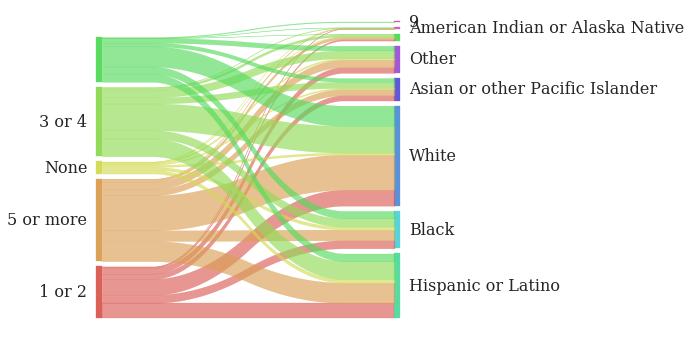

In [32]:
sankey.sankey(data.friends, data.race, aspect=4, fontsize=16)

There are more diversity in the amount by race, White and Hispanic or Latino have the most amount of friends.

For a better understanding of the relationship, proceed to analyze the correlation that exists between the number of friends with each race:

In [7]:
df = pd.concat([data[['friends','race']], pd.get_dummies(data[['friends','race']], prefix=['friends','race'])],axis=1)

In [8]:
df.head()

,friends,race,friends_,friends_1 or 2,friends_3 or 4,friends_5 or more,friends_None,race_,race_9,race_American Indian or Alaska Native,race_Asian or other Pacific Islander,race_Black,race_Hispanic or Latino,race_Other,race_White
0,1 or 2,Hispanic or Latino,0,1,0,0,0,0,0,0,0,0,1,0,0
1,1 or 2,Hispanic or Latino,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1 or 2,Black,0,1,0,0,0,0,0,0,0,1,0,0,0
3,5 or more,Hispanic or Latino,0,0,0,1,0,0,0,0,0,0,1,0,0
4,None,Hispanic or Latino,0,0,0,0,1,0,0,0,0,0,1,0,0


In [9]:
# Compute the correlation matrix
corr = df.corr()
corr

,friends_,friends_1 or 2,friends_3 or 4,friends_5 or more,friends_None,race_,race_9,race_American Indian or Alaska Native,race_Asian or other Pacific Islander,race_Black,race_Hispanic or Latino,race_Other,race_White
friends_,1.000000,-0.226943,-0.274636,-0.310684,-0.100673,-0.065066,0.111768,-0.008833,-0.006135,0.027716,-0.076003,-0.001130,0.062267
friends_1 or 2,-0.226943,1.000000,-0.299518,-0.338833,-0.109794,-0.001178,-0.025365,0.001041,0.024393,0.015507,0.052706,0.011733,-0.076548
friends_3 or 4,-0.274636,-0.299518,1.000000,-0.410040,-0.132868,0.030302,-0.030695,-0.001200,0.003165,-0.041412,0.012241,0.014350,0.001863
friends_5 or more,-0.310684,-0.338833,-0.410040,1.000000,-0.150308,0.025375,-0.034724,-0.006576,-0.027110,-0.028118,-0.005681,-0.029976,0.056348
friends_None,-0.100673,-0.109794,-0.132868,-0.150308,1.000000,-0.000749,-0.011252,0.030935,0.018072,0.070003,0.023350,0.015933,-0.095156
race_,-0.065066,-0.001178,0.030302,0.025375,-0.000749,1.000000,-0.008131,-0.012480,-0.048990,-0.065304,-0.091579,-0.054377,-0.126044
race_9,0.111768,-0.025365,-0.030695,-0.034724,-0.011252,-0.008131,1.000000,-0.003990,-0.015663,-0.020879,-0.029279,-0.017385,-0.040298
race_American Indian or Alaska Native,-0.008833,0.001041,-0.001200,-0.006576,0.030935,-0.012480,-0.003990,1.000000,-0.024042,-0.032048,-0.044942,-0.026685,-0.061856
race_Asian or other Pacific Islander,-0.006135,0.024393,0.003165,-0.027110,0.018072,-0.048990,-0.015663,-0.024042,1.000000,-0.125803,-0.176418,-0.104752,-0.242813
race_Black,0.027716,0.015507,-0.041412,-0.028118,0.070003,-0.065304,-0.020879,-0.032048,-0.125803,1.000000,-0.235169,-0.139636,-0.323674


Text(0,0.5,'Correlation')

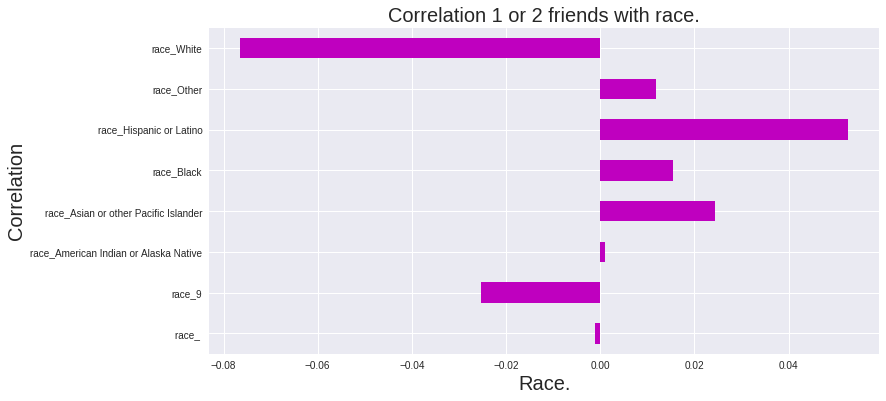

In [22]:
plt.figure(figsize=(12,6))
corr['friends_1 or 2'][5:].plot(kind='barh', color = 'm')
plt.title('Correlation 1 or 2 friends with race.',fontsize=20)
plt.xlabel('Race.',fontsize=20)
plt.ylabel('Correlation',fontsize=20)

You can see that there is a great negative correlation between the white race and 1 or 2 friends, so you can think that the possibility that a student is white and does not have 1 or 2 friends is greater than yes. However, if the race is Hispanic or Latino there is a greater chance that you have 1 or 2 friends. We can consider similar behavior for the Asian race or other Pacific Islanfer, and the race_9

Text(0,0.5,'Correlation')

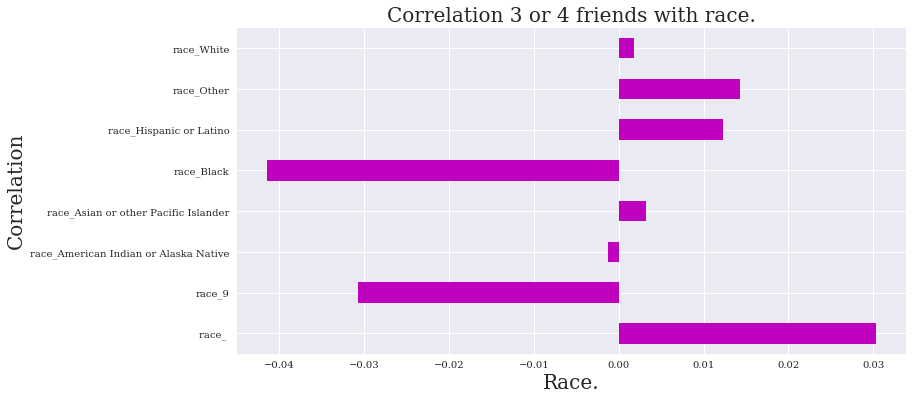

In [43]:
plt.figure(figsize=(12,6))
corr['friends_3 or 4'][5:].plot(kind='barh', color = 'm')
plt.title('Correlation 3 or 4 friends with race.',fontsize=20)
plt.xlabel('Race.',fontsize=20)
plt.ylabel('Correlation',fontsize=20)

in this case can see that there are a big negative correlation betwen black race and 9 race whit 3 or 4 frinds, then can thing that there are a posibility that when a alumn is black she does not have 3 or 4 friends.

Text(0,0.5,'Correlation')

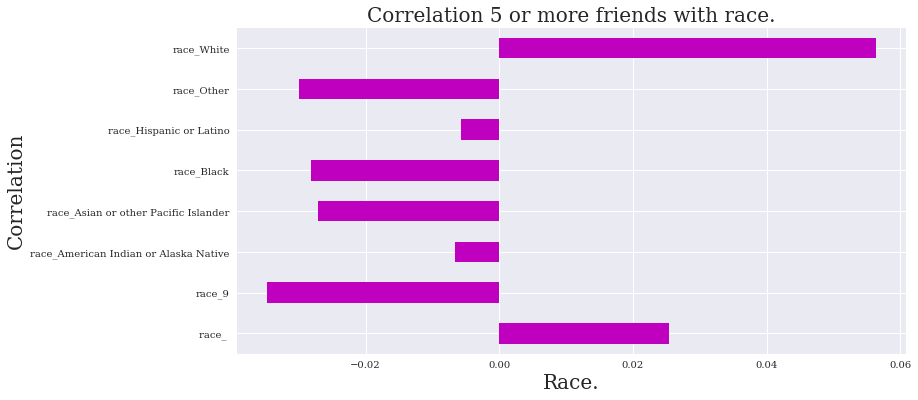

In [45]:
plt.figure(figsize=(12,6))
corr['friends_5 or more'][5:].plot(kind='barh', color = 'm')
plt.title('Correlation 5 or more friends with race.',fontsize=20)
plt.xlabel('Race.',fontsize=20)
plt.ylabel('Correlation',fontsize=20)

In this case, we can see that more often those who have more than 5 friends are white. While for the other race the belt is reversed.